In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [2]:
data = pd.read_csv("Spotify_Features.csv")
data.head()

,duration_ms_x,popularity,track_number,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity_class
0,364613,7,9,0.5850,0.579,0.463,0.00000,7,0.0892,-9.657,1,0.0303,124.977,0.447,0
1,234160,14,2,0.4870,0.534,0.659,0.08080,0,0.0892,-8.279,1,0.0270,107.052,0.497,0
2,243160,71,2,0.2890,0.537,0.712,0.00568,5,0.0800,-5.597,1,0.0286,159.871,0.704,1
3,236453,55,5,0.6380,0.568,0.609,0.55300,11,0.0990,-7.167,1,0.0347,88.673,0.470,0
4,307213,8,3,0.0995,0.362,0.658,0.01020,4,0.0602,-5.929,1,0.0292,104.210,0.155,0


In [3]:
data.dtypes

duration_ms_x         int64
popularity            int64
track_number          int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
valence             float64
popularity_class      int64
dtype: object

In [4]:
data = data.drop(columns=['popularity'])

In [5]:
## Creating Feature: Mood. Light vs Dark. 0 = dark, 1 = light


In [6]:
def mood(row):
    if row['key'] == 0 and row['mode'] == 0 or row['key'] == 2 and row['mode'] == 0 or row['key'] == 3 and row['mode'] == 0 or row['key'] == 4 and row['mode'] == 0 or row['key'] == 5 and row['mode'] == 0 or row['key'] == 6 and row['mode'] == 0 or row['key'] == 7 and row['mode'] == 0 or row['key'] == 9 and row['mode'] == 0 or row['key'] == 9 and row['mode'] == 1 or row['key'] == 10 and row['mode'] == 0 or row['key'] == 11 and row['mode'] == 0:
        return 1
    else:
        return 0

In [7]:
data.apply(lambda row: mood(row), axis=1)

0       0
1       0
2       0
3       0
4       0
5       1
6       1
7       0
8       1
9       0
10      0
11      1
12      1
13      0
14      0
15      0
16      1
17      0
18      1
19      1
20      0
21      0
22      1
23      0
24      0
25      0
26      1
27      0
28      1
29      0
       ..
1082    0
1083    0
1084    0
1085    0
1086    1
1087    0
1088    0
1089    0
1090    0
1091    0
1092    0
1093    0
1094    0
1095    0
1096    0
1097    0
1098    1
1099    0
1100    0
1101    1
1102    0
1103    1
1104    0
1105    0
1106    0
1107    1
1108    0
1109    0
1110    1
1111    1
Length: 1112, dtype: int64

In [8]:
data['mood'] = data.apply (lambda row: mood(row), axis=1)

In [9]:
data

,duration_ms_x,track_number,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity_class,mood
0,364613,9,0.585000,0.579,0.463,0.000000,7,0.0892,-9.657,1,0.0303,124.977,0.4470,0,0
1,234160,2,0.487000,0.534,0.659,0.080800,0,0.0892,-8.279,1,0.0270,107.052,0.4970,0,0
2,243160,2,0.289000,0.537,0.712,0.005680,5,0.0800,-5.597,1,0.0286,159.871,0.7040,1,0
3,236453,5,0.638000,0.568,0.609,0.553000,11,0.0990,-7.167,1,0.0347,88.673,0.4700,0,0
4,307213,3,0.099500,0.362,0.658,0.010200,4,0.0602,-5.929,1,0.0292,104.210,0.1550,0,0
5,216853,1,0.308000,0.486,0.636,0.000013,9,0.1190,-6.031,1,0.0281,80.405,0.6420,0,1
6,239066,1,0.770000,0.609,0.554,0.000034,9,0.6720,-7.801,1,0.0395,90.098,0.2800,0,1
7,317426,1,0.365000,0.438,0.806,0.055100,5,0.2370,-5.717,1,0.0395,96.156,0.4890,0,0
8,203733,8,0.000625,0.579,0.662,0.000004,9,0.1170,-6.885,1,0.0245,102.951,0.5740,0,1
9,138346,1,0.000052,0.593,0.558,0.774000,2,0.0989,-11.182,1,0.0520,155.032,0.9810,0,0


In [10]:
data

,duration_ms_x,track_number,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity_class,mood
0,364613,9,0.585000,0.579,0.463,0.000000,7,0.0892,-9.657,1,0.0303,124.977,0.4470,0,0
1,234160,2,0.487000,0.534,0.659,0.080800,0,0.0892,-8.279,1,0.0270,107.052,0.4970,0,0
2,243160,2,0.289000,0.537,0.712,0.005680,5,0.0800,-5.597,1,0.0286,159.871,0.7040,1,0
3,236453,5,0.638000,0.568,0.609,0.553000,11,0.0990,-7.167,1,0.0347,88.673,0.4700,0,0
4,307213,3,0.099500,0.362,0.658,0.010200,4,0.0602,-5.929,1,0.0292,104.210,0.1550,0,0
5,216853,1,0.308000,0.486,0.636,0.000013,9,0.1190,-6.031,1,0.0281,80.405,0.6420,0,1
6,239066,1,0.770000,0.609,0.554,0.000034,9,0.6720,-7.801,1,0.0395,90.098,0.2800,0,1
7,317426,1,0.365000,0.438,0.806,0.055100,5,0.2370,-5.717,1,0.0395,96.156,0.4890,0,0
8,203733,8,0.000625,0.579,0.662,0.000004,9,0.1170,-6.885,1,0.0245,102.951,0.5740,0,1
9,138346,1,0.000052,0.593,0.558,0.774000,2,0.0989,-11.182,1,0.0520,155.032,0.9810,0,0


In [11]:
data = data.drop(columns=['speechiness'])

In [12]:
data.head()

,duration_ms_x,track_number,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,tempo,valence,popularity_class,mood
0,364613,9,0.5850,0.579,0.463,0.00000,7,0.0892,-9.657,1,124.977,0.447,0,0
1,234160,2,0.4870,0.534,0.659,0.08080,0,0.0892,-8.279,1,107.052,0.497,0,0
2,243160,2,0.2890,0.537,0.712,0.00568,5,0.0800,-5.597,1,159.871,0.704,1,0
3,236453,5,0.6380,0.568,0.609,0.55300,11,0.0990,-7.167,1,88.673,0.470,0,0
4,307213,3,0.0995,0.362,0.658,0.01020,4,0.0602,-5.929,1,104.210,0.155,0,0


In [13]:
data.to_csv('Spotify_data_mood.csv')

In [14]:
### Viewing Distributions

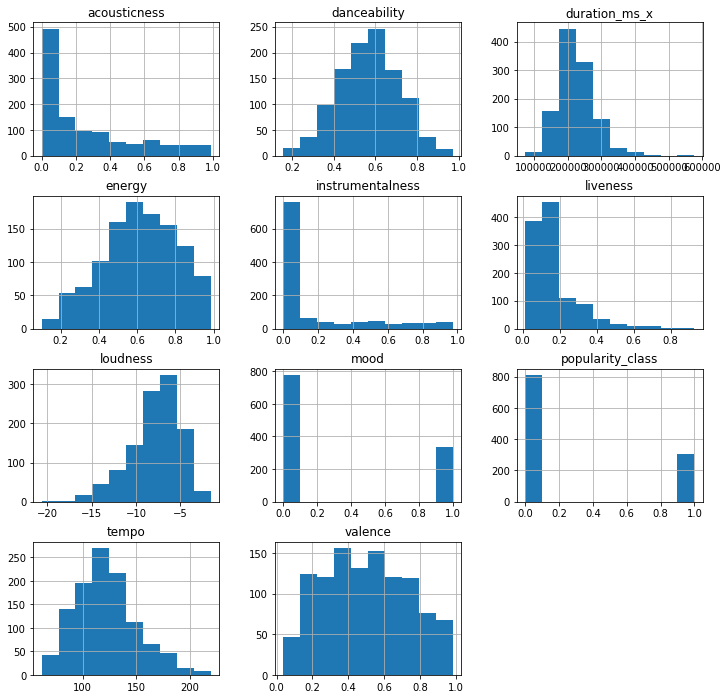

In [15]:
data[['duration_ms_x', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'valence', 'mood', 'popularity_class']].hist(figsize  = [12, 12]); 


In [16]:
#Tree ensambles and random forests

### My Features/Predictors


duration_ms_x: continuous
acousticness: continuous
danceability: continuous	
energy: continuous	
instrumentalness: continuous	
liveness: continuous		
loudness: continuous		
speechiness: continuous		
tempo: continuous		
valence: continuous		
mood: catagorical

In [17]:
data.dtypes

duration_ms_x         int64
track_number          int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
tempo               float64
valence             float64
popularity_class      int64
mood                  int64
dtype: object

## Training Data

In [18]:
target = data['popularity_class']
data2 = data.drop("popularity_class", axis=1, inplace=False)
data2

,duration_ms_x,track_number,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,tempo,valence,mood
0,364613,9,0.585000,0.579,0.463,0.000000,7,0.0892,-9.657,1,124.977,0.4470,0
1,234160,2,0.487000,0.534,0.659,0.080800,0,0.0892,-8.279,1,107.052,0.4970,0
2,243160,2,0.289000,0.537,0.712,0.005680,5,0.0800,-5.597,1,159.871,0.7040,0
3,236453,5,0.638000,0.568,0.609,0.553000,11,0.0990,-7.167,1,88.673,0.4700,0
4,307213,3,0.099500,0.362,0.658,0.010200,4,0.0602,-5.929,1,104.210,0.1550,0
5,216853,1,0.308000,0.486,0.636,0.000013,9,0.1190,-6.031,1,80.405,0.6420,1
6,239066,1,0.770000,0.609,0.554,0.000034,9,0.6720,-7.801,1,90.098,0.2800,1
7,317426,1,0.365000,0.438,0.806,0.055100,5,0.2370,-5.717,1,96.156,0.4890,0
8,203733,8,0.000625,0.579,0.662,0.000004,9,0.1170,-6.885,1,102.951,0.5740,1
9,138346,1,0.000052,0.593,0.558,0.774000,2,0.0989,-11.182,1,155.032,0.9810,0


In [19]:
data_train, data_test, target_train, target_test = train_test_split(data2, target, 
                                                                   test_size = 0.20, random_state=42)

In [20]:
# regular decision tree classifier

In [21]:
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [22]:
tree_clf.feature_importances_

array([0.09468227, 0.17693437, 0.10768696, 0.09142312, 0.21736824,
       0.        , 0.03543839, 0.12722514, 0.        , 0.        ,
       0.12760257, 0.02163894, 0.        ])

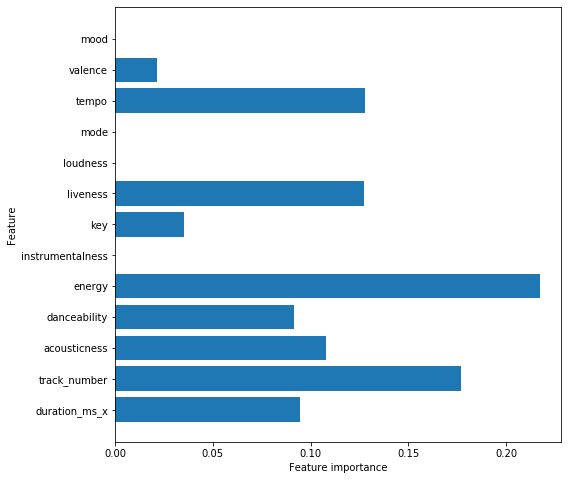

In [23]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(tree_clf)

How are the results for this?

In [24]:
pred = tree_clf.predict(data_test)
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[154  14]
 [ 49   6]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       168
           1       0.30      0.11      0.16        55

    accuracy                           0.72       223
   macro avg       0.53      0.51      0.50       223
weighted avg       0.65      0.72      0.66       223



In [25]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 71.75%


## Now bagged trees

In [26]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=10)

In [27]:
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [28]:
bagged_tree.score(data_train, target_train)

0.7885264341957255

In [29]:
bagged_tree.score(data_test, target_test)

0.7399103139013453

In [30]:
pred = bagged_tree.predict(data_test)
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[159   9]
 [ 49   6]]
              precision    recall  f1-score   support

           0       0.76      0.95      0.85       168
           1       0.40      0.11      0.17        55

    accuracy                           0.74       223
   macro avg       0.58      0.53      0.51       223
weighted avg       0.67      0.74      0.68       223



In [31]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 73.99%


In [32]:
### Another Ensamble Method: Random Forests

In [33]:
forest = RandomForestClassifier(n_estimators=15, max_depth= 5)
forest.fit(data_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
forest.score(data_train, target_train)

0.7637795275590551

In [35]:
forest.score(data_test, target_test)

0.7354260089686099

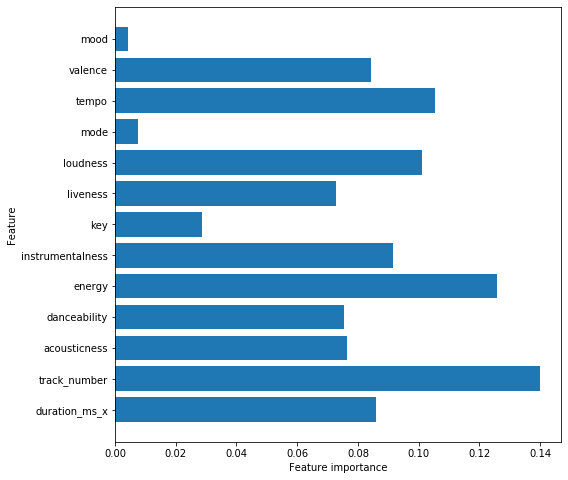

In [36]:
plot_feature_importances(forest)

In [37]:
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 5)
forest_2.fit(data_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
rf_tree_1 = forest_2.estimators_[0]

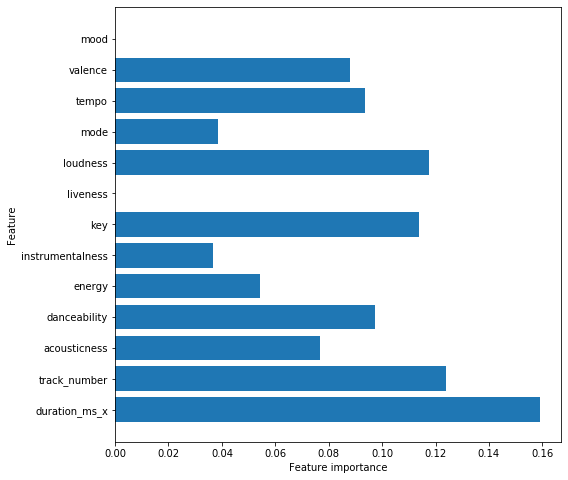

In [39]:
plot_feature_importances(rf_tree_1)

In [40]:
rf_tree_2 = forest_2.estimators_[1]

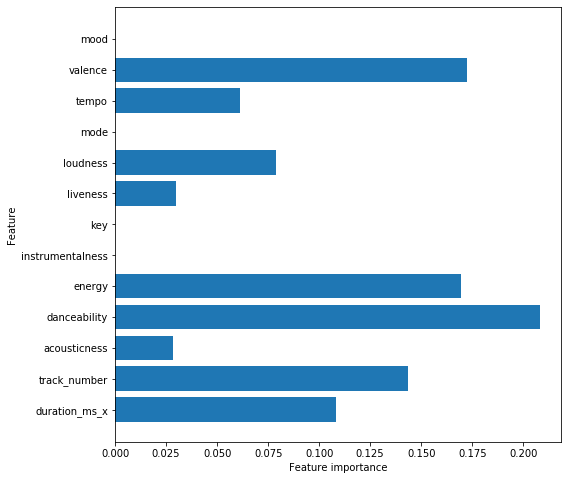

In [41]:
plot_feature_importances(rf_tree_2)


In [42]:
pred = forest.predict(data_test)
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[164   4]
 [ 55   0]]
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       168
           1       0.00      0.00      0.00        55

    accuracy                           0.74       223
   macro avg       0.37      0.49      0.42       223
weighted avg       0.56      0.74      0.64       223



In [43]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 73.54%


## Grid Search CV

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import time

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data2, target, 
                                                                   test_size = 0.20, random_state=42)

In [46]:
dt_clf = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 61.65%


In [47]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [48]:
num_decision_trees = 3 * 2 * 6 * 3 * 6
print(f"Grid Search will have to search through {num_decision_trees} different permutations.")

Grid Search will have to search through 648 different permutations.


In [49]:
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                

In [50]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(X_train, y_train)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Testing Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 78.51%
Mean Testing Score: 72.22%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [51]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 73.54%


In [52]:
pred = dt_grid_search.predict(data_test)
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[168   0]
 [ 55   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       168
           1       0.00      0.00      0.00        55

    accuracy                           0.75       223
   macro avg       0.38      0.50      0.43       223
weighted avg       0.57      0.75      0.65       223



/Users/catherinewolk/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
## Random Forest Tuning

In [54]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 68.61%


/Users/catherinewolk/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/catherinewolk/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/catherinewolk/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [55]:
### Tuning Gradient Boosted Trees (AdaBoost)


In [56]:
adaboost_clf = AdaBoostClassifier()
adaboost_mean_cv_score = np.mean(cross_val_score(adaboost_clf, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for AdaBoost: {adaboost_mean_cv_score :.2%}")

Mean Cross Validation Score for AdaBoost: 68.39%


In [57]:
adaboost_param_grid = {
    'n_estimators': [50, 100, 250],
    'learning_rate': [1.0, 0.5, 0.1]
}

In [58]:
start = time.time()
adaboost_grid_search = GridSearchCV(adaboost_clf, adaboost_param_grid, cv=3)
adaboost_grid_search.fit(X_train, y_train)

print(f"Testing Accuracy: {adaboost_grid_search.best_score_ :.2%}")
print(f"Total Runtime for Grid Search on AdaBoost: {time.time() - start :.2f} seconds")
print("")
print(f"Optimal Parameters: {adaboost_grid_search.best_params_}")

Testing Accuracy: 71.88%
Total Runtime for Grid Search on AdaBoost: 7.10 seconds

Optimal Parameters: {'learning_rate': 0.1, 'n_estimators': 50}


In [59]:
pred = adaboost_grid_search.predict(data_test)
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[168   0]
 [ 55   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       168
           1       0.00      0.00      0.00        55

    accuracy                           0.75       223
   macro avg       0.38      0.50      0.43       223
weighted avg       0.57      0.75      0.65       223



/Users/catherinewolk/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [60]:
from sklearn.metrics import confusion_matrix
pred = dt_grid_search.predict(X_test)
cm = confusion_matrix(y_test,pred)
classes = ['Popular', 'Unpopular']

In [61]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[168   0]
 [ 55   0]]


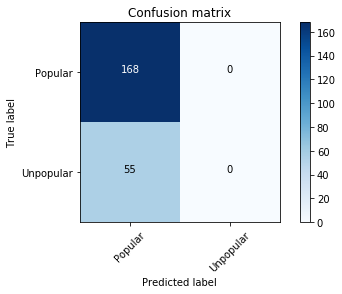

In [62]:
#dt_grid search

import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [63]:
### More feature analysis

In [64]:
pop_predictors = data.iloc[:,2:]
corr = pop_predictors.corr()

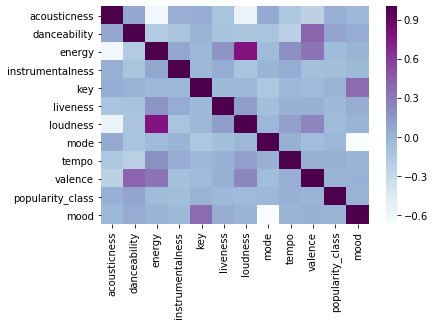

In [65]:
sns.heatmap(corr,cmap = 'BuPu')

In [66]:
corr[abs(data2.corr() > 0.75)]

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,tempo,valence,popularity_class,mood
acousticness,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,NaN,NaN,1.000000,NaN,NaN,NaN,0.773175,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
key,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
loudness,NaN,NaN,0.773175,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
mode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
valence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [67]:
#loudness and energy are closeley correlated

In [68]:
# Run grid search model again excluding loudness

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import time

In [70]:
target2 = data['popularity_class']
data3 = data2.drop("loudness", axis=1, inplace=False)
data3

,duration_ms_x,track_number,acousticness,danceability,energy,instrumentalness,key,liveness,mode,tempo,valence,mood
0,364613,9,0.585000,0.579,0.463,0.000000,7,0.0892,1,124.977,0.4470,0
1,234160,2,0.487000,0.534,0.659,0.080800,0,0.0892,1,107.052,0.4970,0
2,243160,2,0.289000,0.537,0.712,0.005680,5,0.0800,1,159.871,0.7040,0
3,236453,5,0.638000,0.568,0.609,0.553000,11,0.0990,1,88.673,0.4700,0
4,307213,3,0.099500,0.362,0.658,0.010200,4,0.0602,1,104.210,0.1550,0
5,216853,1,0.308000,0.486,0.636,0.000013,9,0.1190,1,80.405,0.6420,1
6,239066,1,0.770000,0.609,0.554,0.000034,9,0.6720,1,90.098,0.2800,1
7,317426,1,0.365000,0.438,0.806,0.055100,5,0.2370,1,96.156,0.4890,0
8,203733,8,0.000625,0.579,0.662,0.000004,9,0.1170,1,102.951,0.5740,1
9,138346,1,0.000052,0.593,0.558,0.774000,2,0.0989,1,155.032,0.9810,0


In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data3, target2, 
                                                                   test_size = 0.20, random_state=42)

In [72]:
dt_clf = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 59.73%


In [73]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [74]:
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                

In [75]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(X_train, y_train)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Testing Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 78.39%
Mean Testing Score: 73.34%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [76]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 75.34%


In [77]:
pred = dt_grid_search.predict(data_test)
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

ValueError: Number of features of the model must match the input. Model n_features is 12 and input n_features is 13 

In [ ]:
#mse = mean_squared_error(regPred, y_test)
#mse